In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df = pd.DataFrame(data)
features = ['Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_features, columns=features)

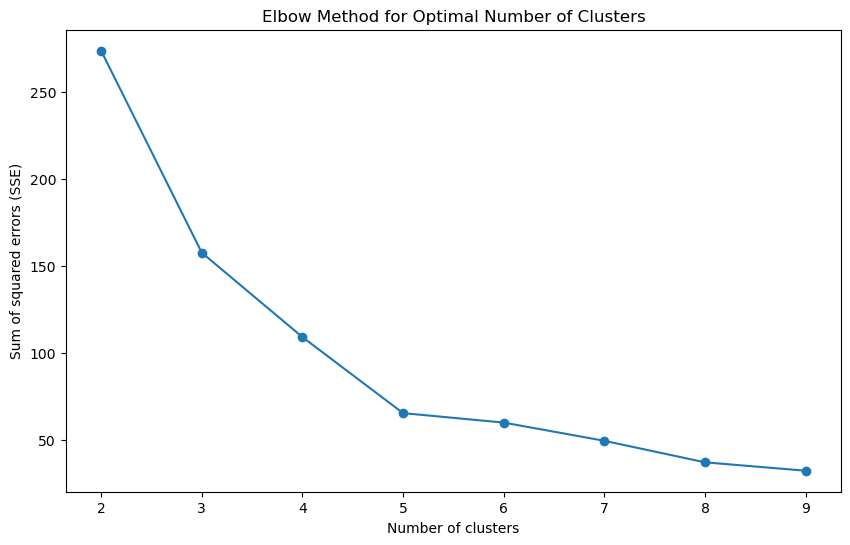

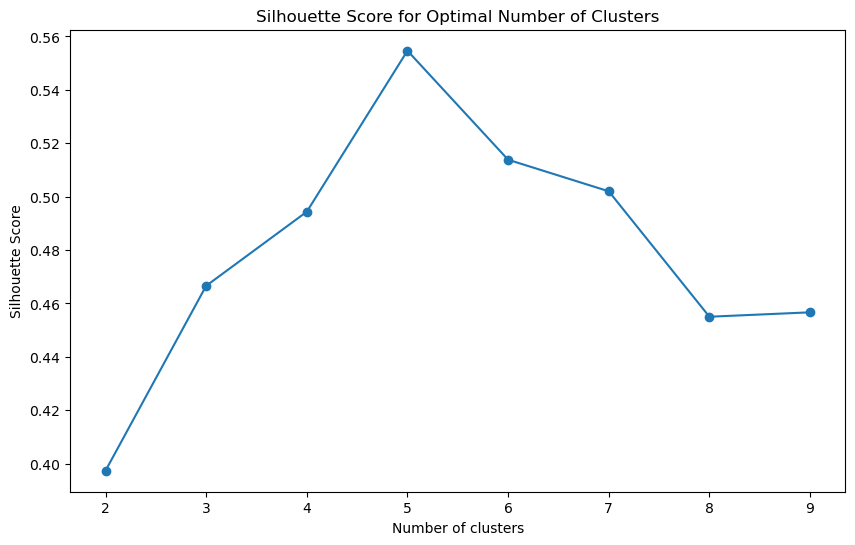

Silhouette Score for k=5: 0.5547


In [4]:
sse = []
silhouette_scores = []
k_range = range(2, 10) 

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


optimal_k =  k_range[np.argmax(silhouette_scores)]

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_df)

silhouette_avg = silhouette_score(scaled_df, df['Cluster'])
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.4f}')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


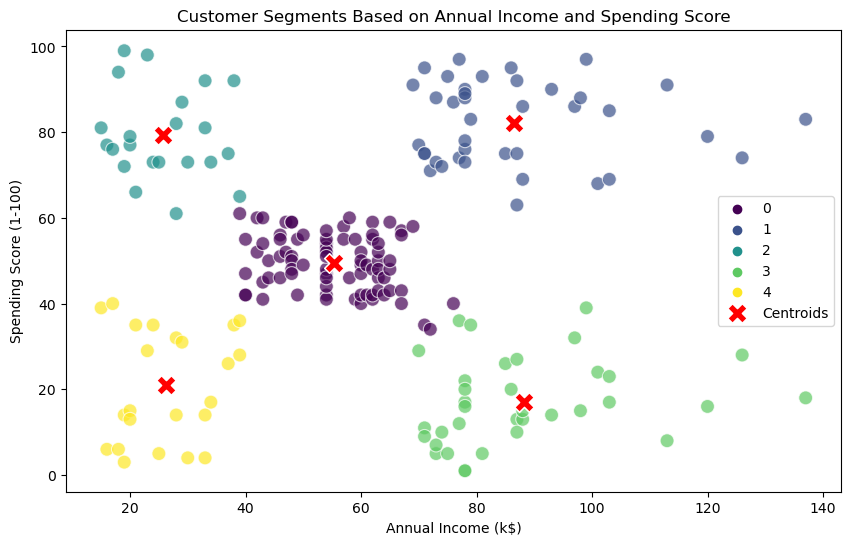

In [6]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100, alpha=0.7)

centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=features)
sns.scatterplot(data=centroids_df, x='Annual Income (k$)', y='Spending Score (1-100)', color='red', s=200, marker='X', label='Centroids')

plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [7]:
new_data = pd.DataFrame({
    'Annual Income (k$)': [15, 15, 17],
    'Spending Score (1-100)': [39, 81, 40]
})


scaled_new_data = scaler.transform(new_data)


predicted_clusters = kmeans.predict(scaled_new_data)


new_data['Cluster'] = predicted_clusters

print("New Data with Cluster Predictions:")
new_data

New Data with Cluster Predictions:


C:\Users\bhara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,17,40,4
